In [0]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import Ridge, Lasso, LinearRegression
from sklearn.model_selection import train_test_split

import numpy as np
import pandas as pd

import mlflow
from mlflow.models import make_metric

import os
import matplotlib.pyplot as plt

In [0]:
dbutils.fs.ls("/FileStore/tables/")

Out[2]: [FileInfo(path='dbfs:/FileStore/tables/media_prediction_and_its_cost-1.csv', name='media_prediction_and_its_cost-1.csv', size=16667988, modificationTime=1682550968000),
 FileInfo(path='dbfs:/FileStore/tables/media_prediction_and_its_cost-2.csv', name='media_prediction_and_its_cost-2.csv', size=16667988, modificationTime=1682551383000),
 FileInfo(path='dbfs:/FileStore/tables/media_prediction_and_its_cost.csv', name='media_prediction_and_its_cost.csv', size=16667988, modificationTime=1682548452000),
 FileInfo(path='dbfs:/FileStore/tables/media_prediction_and_its_cost_NEW-1.csv', name='media_prediction_and_its_cost_NEW-1.csv', size=14592433, modificationTime=1682602944000),
 FileInfo(path='dbfs:/FileStore/tables/media_prediction_and_its_cost_NEW.csv', name='media_prediction_and_its_cost_NEW.csv', size=14592433, modificationTime=1682555895000)]

In [0]:
# df_raw = pd.read_csv("/Users/benmeiga/Downloads/media prediction and its cost.csv")

# File location and type
file_location = "/FileStore/tables/media_prediction_and_its_cost-1.csv"
file_type = "csv"

# CSV options
infer_schema = "True"
first_row_is_header = "True"
delimiter = ","

# The applied options are for CSV files. For other file types, these will be ignored.
df = spark.read.format(file_type) \
  .option("inferSchema", infer_schema) \
  .option("header", first_row_is_header) \
  .option("sep", delimiter) \
  .load(file_location)

df_raw = df.toPandas()

In [0]:
df_raw

,food_category,food_department,food_family,store_sales(in millions),store_cost(in millions),unit_sales(in millions),promotion_name,sales_country,marital_status,gender,...,grocery_sqft,frozen_sqft,meat_sqft,coffee_bar,video_store,salad_bar,prepared_food,florist,media_type,cost
0,Breakfast Foods,Frozen Foods,Food,7.36,2.7232,4.0,Bag Stuffers,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",126.62
1,Breakfast Foods,Frozen Foods,Food,5.52,2.5944,3.0,Cash Register Lottery,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",59.86
2,Breakfast Foods,Frozen Foods,Food,3.68,1.3616,2.0,High Roller Savings,USA,S,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,"Daily Paper, Radio",84.16
3,Breakfast Foods,Frozen Foods,Food,3.68,1.1776,2.0,Cash Register Lottery,USA,M,F,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,In-Store Coupon,95.78
4,Breakfast Foods,Frozen Foods,Food,4.08,1.4280,3.0,Double Down Sale,USA,M,M,...,18670.0,5415.0,3610.0,1.0,1.0,1.0,1.0,1.0,Radio,50.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60423,Specialty,Carousel,Non-Consumable,2.76,1.3248,1.0,You Save Days,USA,M,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,In-Store Coupon,95.25
60424,Specialty,Carousel,Non-Consumable,1.60,0.4960,1.0,Price Cutters,USA,S,F,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,Sunday Paper,69.42
60425,Specialty,Carousel,Non-Consumable,5.52,2.5392,2.0,Weekend Markdown,USA,M,M,...,15321.0,4294.0,2863.0,1.0,0.0,0.0,0.0,0.0,"Sunday Paper, Radio, TV",67.51
60426,Specialty,Carousel,Non-Consumable,8.28,2.5668,3.0,Sales Days,Canada,S,M,...,27463.0,4193.0,2795.0,1.0,0.0,0.0,0.0,1.0,Sunday Paper,132.88


In [0]:
df_raw.info()

num_list = ['store_sales(in millions)', "store_cost(in millions)", "unit_sales(in millions)", "gross_weight", "net_weight", "recyclable_package", "low_fat", "units_per_case"]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60428 entries, 0 to 60427
Data columns (total 40 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   food_category               60428 non-null  object 
 1   food_department             60428 non-null  object 
 2   food_family                 60428 non-null  object 
 3   store_sales(in millions)    60428 non-null  float64
 4   store_cost(in millions)     60428 non-null  float64
 5   unit_sales(in millions)     60428 non-null  float64
 6   promotion_name              60428 non-null  object 
 7   sales_country               60428 non-null  object 
 8   marital_status              60428 non-null  object 
 9   gender                      60428 non-null  object 
 10  total_children              60428 non-null  float64
 11  education                   60428 non-null  object 
 12  member_card                 60428 non-null  object 
 13  occupation                  604

2023/04/27 01:23:55 INFO mlflow.models.evaluation.base: Evaluating the model with the default evaluator.
2023/04/27 01:23:56 WARNING mlflow.models.evaluation.default_evaluator: SHAP or matplotlib package is not installed, so model explainability insights will not be logged.
metrics:
{'score': -6.832028255465694e-05, 'example_count': 12086, 'mean_absolute_error': 26.091546222411274, 'mean_squared_error': 903.5829093159281, 'root_mean_squared_error': 30.05965584160817, 'sum_on_target': 1196178.9599999937, 'mean_on_target': 98.97227866953448, 'r2_score': -6.832028255465694e-05, 'max_error': 51.256832186956615, 'mean_absolute_percentage_error': 0.30539541910243684, 'squared_diff_plus_one': 10941545.469783265, 'sum_on_target_divided_by_two': 598089.4799999968}
artifacts:
{'example_scatter_plot_artifact': ImageEvaluationArtifact(uri='dbfs:/databricks/mlflow-tracking/4410962850347398/c251813664554974934901b0b393b190/artifacts/example_scatter_plot_artifact.png')}


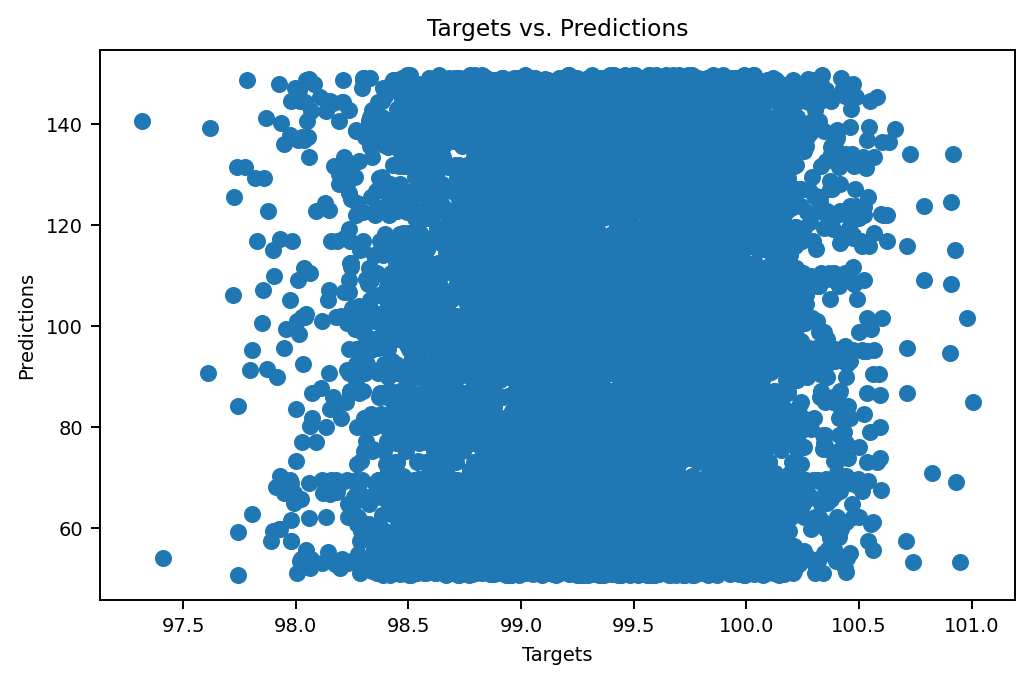

In [0]:

# split the dataset into train and test partitions
X_train, X_test, y_train, y_test = train_test_split(
    df_raw[num_list], df_raw['cost'], test_size=0.2, random_state=123
)

# train the model
# gbr = GradientBoostingRegressor().fit(X_train, y_train)
model = LinearRegression().fit(X_train, y_train)

# creating the evaluation dataframe
eval_data = X_test.copy()
eval_data["target"] = y_test


def squared_diff_plus_one(eval_df, _builtin_metrics):
    """
    This example custom metric function creates a metric based on the ``prediction`` and
    ``target`` columns in ``eval_df``.
    """
    return np.sum(np.abs(eval_df["prediction"] - eval_df["target"] + 1) ** 2)


def sum_on_target_divided_by_two(_eval_df, builtin_metrics):
    """
    This example custom metric function creates a metric derived from existing metrics in
    ``builtin_metrics``.
    """
    return builtin_metrics["sum_on_target"] / 2


def prediction_target_scatter(eval_df, _builtin_metrics, artifacts_dir):
    """
    This example custom artifact generates and saves a scatter plot to ``artifacts_dir`` that
    visualizes the relationship between the predictions and targets for the given model to a
    file as an image artifact.
    """
    plt.scatter(eval_df["prediction"], eval_df["target"])
    plt.xlabel("Targets")
    plt.ylabel("Predictions")
    plt.title("Targets vs. Predictions")
    plot_path = os.path.join(artifacts_dir, "example_scatter_plot.png")
    plt.savefig(plot_path)
    return {"example_scatter_plot_artifact": plot_path}

# mlflow.set_experiment("/MLflow//Regression")

experiment_id = "4410962850347398"

with mlflow.start_run(experiment_id = experiment_id) as run:
    mlflow.sklearn.log_model(model, "model")
    model_uri = mlflow.get_artifact_uri("model")
    result = mlflow.evaluate(
        model=model_uri,
        data=eval_data,
        targets="target",
        model_type="regressor",
        evaluators=["default"],
        custom_metrics=[
            make_metric(
                eval_fn=squared_diff_plus_one,
                greater_is_better=False,
            ),
            make_metric(
                eval_fn=sum_on_target_divided_by_two,
                greater_is_better=True,
            ),
        ],
        custom_artifacts=[prediction_target_scatter],
    )

print(f"metrics:\n{result.metrics}")
print(f"artifacts:\n{result.artifacts}")
